# Advanced Data Science and Machine Learning. Cal State Univ. LA, CS Dept.
### Dr. Mohammad Porhoumayoun
----------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------


# Data Science in Python

#### This is a review of data sceince libraries/packages in python. Feel free to refer to the suggested resources and documentaries for more details.

---------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------


##### Note: The ANN Library that we use in this tutorial is available in the latest revision of SKLEARN (v0.18 and up) and not in previous version (v0.17). Thus, make sure to update your sklearn. 
##### If you have ANACONDA, you can easily update that by running the following comand in the terminal (in Mac): "conda update scikit-learn"


# Artificial Neural Networks (ANN) 


In [1]:
# Importing libraries and packages:

from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Set up the Feature Matrix and Label Vector:

In [2]:
# "read_csv" is a pandas function to read csv files from web or local device:

cancer_df = pd.read_csv('https://github.com/mpourhoma/CS4662/raw/master/Cancer.csv')

# checking the dataset by printing every 10 lines:
cancer_df.head()

,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Malignant_Cancer
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [3]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']

# use the above list to select the features from the original DataFrame
X = cancer_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = cancer_df['Malignant_Cancer']

# print the first 5 rows
#print(X.head())
#print(y.head())

#### Splitting the Dataset:

In [4]:
# Randomly splitting the original dataset into training set and testing set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# print the size of the traning set:
print(X_train.shape)
print(y_train.shape)

# print the size of the testing set:
print(X_test.shape)
print(y_test.shape)

(120, 9)
(120,)
(30, 9)
(30,)


# ANN Classifier
#### Defining (instantiating) an "object" from the sklearn class "MLPClassifier" (Multi-layer Perceptron (MLP)):

In [5]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The i-th element represents the number of neurons in the i-th hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.
# batch_sizeint: Size of minibatches for stochastic optimizers.
# verbosebool: Whether to print progress
# tol: Tolerance for the optimization. When the loss/score is not improving by at least tol in consecutive iterations. 

# 1 Hidden Layer with 3 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)



#### Training Stage: Training a predictive model using the training dataset:


In [6]:
# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)


Iteration 1, loss = 0.72077171
Iteration 2, loss = 0.68130517
Iteration 3, loss = 0.66588801
Iteration 4, loss = 0.64114880
Iteration 5, loss = 0.61448993
Iteration 6, loss = 0.60552383
Iteration 7, loss = 0.57908327
Iteration 8, loss = 0.55313782
Iteration 9, loss = 0.52851807
Iteration 10, loss = 0.49390139
Iteration 11, loss = 0.46416351
Iteration 12, loss = 0.44396303
Iteration 13, loss = 0.41489495
Iteration 14, loss = 0.38717890
Iteration 15, loss = 0.36637903
Iteration 16, loss = 0.34527060
Iteration 17, loss = 0.32411174
Iteration 18, loss = 0.30743069
Iteration 19, loss = 0.29251313
Iteration 20, loss = 0.27609983
Iteration 21, loss = 0.26246864
Iteration 22, loss = 0.25184502
Iteration 23, loss = 0.24164809
Iteration 24, loss = 0.23199284
Iteration 25, loss = 0.22389185
Iteration 26, loss = 0.21701529
Iteration 27, loss = 0.21109624
Iteration 28, loss = 0.20644898
Iteration 29, loss = 0.20237628
Iteration 30, loss = 0.19840702
Iteration 31, loss = 0.19494457
Iteration 32, los

MLPClassifier(activation='logistic', alpha=1e-05, hidden_layer_sizes=(3,),
              learning_rate_init=0.1, random_state=1, verbose=True)

In [7]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[-0.45903965, -0.43919388,  0.4004736 ],
       [-0.40654214, -0.31047332,  1.08578047],
       [-0.5314016 , -1.05247509,  0.77035774],
       [-0.2136835 ,  0.80248377, -0.47515103],
       [-0.92800216,  1.30640778, -0.72749642],
       [-0.60387944, -0.19254631,  1.37534916],
       [ 0.20398593, -1.4441676 , -1.30125582],
       [-0.33199487, -0.86323116,  1.43168935],
       [ 0.44781533, -0.98020806,  0.63307097]]), array([[-6.3094395 ],
       [-5.40344657],
       [ 3.39992784]])]


[array([ 7.11996482,  6.1599068 , -5.11199128]), array([0.81583102])]


#### Testing (Prediction) Stage: Making prediction on new observations (Testing Data) using the trained model:


In [8]:
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
print(y_predict_ann)

[1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0]


### Accuracy Evaluation:


In [9]:
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 

score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)



 accuracy:  0.8333333333333334


### Repeating with a more complex Neural Network structure (2 Hidden Layers):


In [10]:
# "my_ANN" is instantiated as an "object" of MLPClassifier "class". 
# hidden_layer_sizes: The ith element represents the number of neurons in the ith hidden layer.
# activation: the non-linear function. 'logistic' means Sigmoid Function!
# solver: the type of minimization problem: ‘sgd’ and 'adam' refer to stochastic gradient descent.
# alpha: regularization parameter (L2 penalty term).
# learning_rate_init: learning rate.

# 2 Hidden Layers, first one with 6 neurons, second with 4 neurons:
my_ANN = MLPClassifier(hidden_layer_sizes=(6,4), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

# Training ONLY on the training set:
my_ANN.fit(X_train, y_train)
# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)
#print(y_predict_ann)
# We can now compare the "predicted labels" for the Testing Set with its "actual labels" to evaluate the accuracy 
score_ann = accuracy_score(y_test, y_predict_ann)
print('\n','accuracy: ',score_ann)


Iteration 1, loss = 0.68250817
Iteration 2, loss = 0.68288566
Iteration 3, loss = 0.66473523
Iteration 4, loss = 0.65296866
Iteration 5, loss = 0.63610692
Iteration 6, loss = 0.60906312
Iteration 7, loss = 0.57335960
Iteration 8, loss = 0.52759868
Iteration 9, loss = 0.48099345
Iteration 10, loss = 0.43207301
Iteration 11, loss = 0.38429719
Iteration 12, loss = 0.33974103
Iteration 13, loss = 0.29955641
Iteration 14, loss = 0.27209283
Iteration 15, loss = 0.24442651
Iteration 16, loss = 0.22193289
Iteration 17, loss = 0.20718368
Iteration 18, loss = 0.19511220
Iteration 19, loss = 0.18731407
Iteration 20, loss = 0.18045064
Iteration 21, loss = 0.17511712
Iteration 22, loss = 0.16983626
Iteration 23, loss = 0.16622971
Iteration 24, loss = 0.16357296
Iteration 25, loss = 0.16083273
Iteration 26, loss = 0.15785955
Iteration 27, loss = 0.15473081
Iteration 28, loss = 0.15152052
Iteration 29, loss = 0.14841684
Iteration 30, loss = 0.14446568
Iteration 31, loss = 0.13945822
Iteration 32, los

In [11]:
# Weights:
print(my_ANN.coefs_)
# The ith element in the list represents the weight matrix corresponding to layer i.

print('\n')

# Bias weights:
print(my_ANN.intercepts_)
# The ith element in the list represents the bias vector corresponding to layer i + 1.

[array([[-9.17180634e-01, -2.31153551e-01, -5.66624148e-01,
         7.82852609e-01,  4.26991768e-01, -9.55834955e-01],
       [-9.72095491e-01, -6.90911660e-01, -1.66240892e-01,
        -1.25803545e+00,  3.12806061e-01, -2.25366990e-01],
       [-6.40995350e-01, -1.84961305e-01, -2.18623426e-01,
        -2.53079997e+00,  1.26363826e-01, -4.12540435e-01],
       [ 7.18488862e-01,  4.41028342e-01, -2.16018350e-01,
         9.51621241e-01,  3.69076547e-01,  6.84854218e-01],
       [-4.96288130e-01, -8.15520777e-03, -1.44843370e-04,
        -4.29659198e-01,  1.35751222e-01,  1.81598905e+00],
       [-1.43312726e+00, -1.82864574e+00, -7.08410897e-01,
         5.07214563e-01,  1.04242300e+00, -3.53713321e-02],
       [ 1.17338419e-01,  6.12827183e-01,  2.27333108e-01,
         3.14665959e-02, -2.05486201e-01, -1.47926394e+00],
       [-1.30159584e+00, -1.19626349e+00, -7.41939798e-01,
         4.74585928e-01,  5.33894838e-01, -1.01601126e+00],
       [-5.53940109e-01, -2.57160797e-01,  3.43

## Estimating the Probability (likelihood) of happening the Event: 


In [12]:
# Estimating the probability (likelihood) of Each Label: 
y_predict_prob_ann = my_ANN.predict_proba(X_test)
print(y_predict_ann,'\n')
print(y_predict_prob_ann)

[1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 0 0] 

[[0.32149307 0.67850693]
 [0.00102565 0.99897435]
 [0.00103353 0.99896647]
 [0.00111362 0.99888638]
 [0.85656192 0.14343808]
 [0.00102563 0.99897437]
 [0.00102546 0.99897454]
 [0.00188359 0.99811641]
 [0.99698701 0.00301299]
 [0.00754587 0.99245413]
 [0.00102546 0.99897454]
 [0.0010759  0.9989241 ]
 [0.00103264 0.99896736]
 [0.00102543 0.99897457]
 [0.00147742 0.99852258]
 [0.00103349 0.99896651]
 [0.99741309 0.00258691]
 [0.00883773 0.99116227]
 [0.99747007 0.00252993]
 [0.0051906  0.9948094 ]
 [0.99726066 0.00273934]
 [0.99743144 0.00256856]
 [0.99746935 0.00253065]
 [0.08790108 0.91209892]
 [0.0632823  0.9367177 ]
 [0.00102544 0.99897456]
 [0.99713222 0.00286778]
 [0.99747007 0.00252993]
 [0.99745953 0.00254047]
 [0.98520754 0.01479246]]


# True Positive Rate (TPR) and False Positive Rate (FPR):

In [13]:
from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_predict_prob_ann[:,1], pos_label=1)

print(fpr)
print("\n\n\n")
print(tpr)

[0.         0.         0.         0.07692308 0.07692308 0.15384615
 0.15384615 0.30769231 0.30769231 0.84615385 1.        ]




[0.         0.05882353 0.29411765 0.29411765 0.82352941 0.82352941
 0.88235294 0.88235294 1.         1.         1.        ]


# AUC:

In [14]:
# AUC:
AUC = metrics.auc(fpr, tpr)
print(AUC)

0.9140271493212669


# ROC Curve:

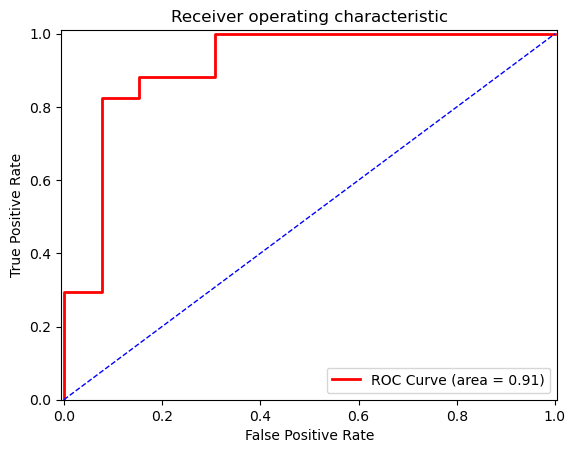

In [15]:
# Importing the "pyplot" package of "matplotlib" library of python to generate 
# graphs and plot curves:
import matplotlib.pyplot as plt

# The following line will tell Jupyter Notebook to keep the figures inside the explorer page 
# rather than openng a new figure window:
%matplotlib inline

plt.figure()

# Roc Curve:
plt.plot(fpr, tpr, color='red', lw=2, 
         label='ROC Curve (area = %0.2f)' % AUC)

# Random Guess line:
plt.plot([0, 1], [0, 1], color='blue', lw=1, linestyle='--')

# Defining The Range of X-Axis and Y-Axis:
plt.xlim([-0.005, 1.005])
plt.ylim([0.0, 1.01])

# Labels, Title, Legend:
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

# Confusion Matrix:


In [16]:
from sklearn import metrics

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)

print("Confusion matrix:")
print(cm_ANN)


Confusion matrix:
[[ 9  4]
 [ 2 15]]


### Confusion Matrix when we have more than two labels:


In [17]:
iris_df = pd.read_csv('https://raw.githubusercontent.com/mpourhoma/CS5661/master/iris.csv')

def categorical_to_numeric(x):
    if x == 'setosa':
        return 0
    elif x == 'versicolor':
        return 1
    elif x == 'virginica':
        return 2
    
iris_df['label'] = iris_df['species'].apply(categorical_to_numeric)

X = iris_df[['sepal_length','sepal_width','petal_length','petal_width']]
y = iris_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1)

# Training on the training set:
my_ANN.fit(X_train, y_train)

# Testing on the testing set:
y_predict_ann = my_ANN.predict(X_test)

# Accuracy: 
score_ann = accuracy_score(y_test, y_predict_ann)
print(score_ann,'\n')

cm_ANN = metrics.confusion_matrix(y_test, y_predict_ann)
print("Confusion matrix:")
print(cm_ANN)



1.0 

Confusion matrix:
[[17  0  0]
 [ 0 15  0]
 [ 0  0 13]]


# Cross-Validation:

** We saw how to split the dataset into Training and Testing sets, Fit the model on "training set", and then predict on "testing set" to evaluate the accuracy. **

**The problem with this method is that the results may depend on the split. In other word, changing which data samples happen to be in the testing set can change the testing accuracy! For example, if you are lucky, some easily predictable samples may happen to be located in the testing set (or vice versa!). **

**In order to get more fair results, we can repeat the splitting process several times, compute the prediction accuracy for each split, and then average the results.**

**Cross Validation tries to reapeat the splitting procedure K times in a smart way such that all data samples will be used in "testing set" one time and in "Training Set" (K-1) times!**


## Three main steps for K-fold cross-validation
1. Split the dataset Randomly into K equal, non-overlapping sections.
2. Use one of the sections as **testing set** at a time and the union of the other (K-1) sections as the **training set**. Perform training stage, testing stage, and compute the accuracy based on the split each time. Repeat this procedure K times, so that each one of the K sections is used as **testing set** one time, and as a part of **training set** (K-1) times.
5. Calculate the average of the accuracies as final result.

Note: Using K=10 (10-fold cross-validation) is very common and recommended in machine learning.

## Cross-Validation in sklearn:

In [18]:
# importing the method:
from sklearn.model_selection import cross_val_score

### Applying 10-fold Cross Validation for ANN classifier:


In [19]:
# create a python list of feature names that would like to pick from the dataset:
feature_cols = ['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape',
                'Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei',
                'Bland_Chromatin','Normal_Nucleoli','Mitoses']

# use the above list to select the features from the original DataFrame
X = cancer_df[feature_cols] 

# select a Series of labels (the last column) from the DataFrame
y = cancer_df['Malignant_Cancer']


In [20]:
# Applying 10-fold cross validation with ANN classifier:

my_ANN = MLPClassifier(hidden_layer_sizes=(3,), activation= 'logistic', 
                       solver='adam', alpha=1e-5, random_state=1, 
                       learning_rate_init = 0.1, verbose=True, tol=0.0001)

# CV:
accuracy_list = cross_val_score(my_ANN, X, y, cv=10, scoring='accuracy')

print('\n\n','accuracy: ',accuracy_list)

Iteration 1, loss = 0.72312033
Iteration 2, loss = 0.68057775
Iteration 3, loss = 0.66530777
Iteration 4, loss = 0.64367592
Iteration 5, loss = 0.61955186
Iteration 6, loss = 0.60888346
Iteration 7, loss = 0.58596007
Iteration 8, loss = 0.56047841
Iteration 9, loss = 0.53743987
Iteration 10, loss = 0.50567470
Iteration 11, loss = 0.47516383
Iteration 12, loss = 0.45460205
Iteration 13, loss = 0.42808462
Iteration 14, loss = 0.39940818
Iteration 15, loss = 0.37668944
Iteration 16, loss = 0.35543137
Iteration 17, loss = 0.33284856
Iteration 18, loss = 0.31344793
Iteration 19, loss = 0.29782935
Iteration 20, loss = 0.28090642
Iteration 21, loss = 0.26583112
Iteration 22, loss = 0.25424677
Iteration 23, loss = 0.24334241
Iteration 24, loss = 0.23265344
Iteration 25, loss = 0.22342858
Iteration 26, loss = 0.21515823
Iteration 27, loss = 0.20742736
Iteration 28, loss = 0.20044718
Iteration 29, loss = 0.19347807
Iteration 30, loss = 0.18667396
Iteration 31, loss = 0.18080076
Iteration 32, los

#### Each element in "accuracy_list" above is the accuracy value in one of the K rounds of cross validation. We will use the average of them as the final accuracy for our model.

#### As we saw, the method "cross_val_score" will take care of everything, including splitting the data, forming Training and Testing sets (K times), Training and Testing the model (K times), and evaluating and reporting the accuracy for each round!

#### Now, we only need to calculate the average of the accuracies from K rounds!

In [21]:
# use average of accuracy values as final result
accuracy_cv = accuracy_list.mean()

print(accuracy_cv)

0.9533333333333334


# How to find the best structure (the number of hidden layers and the number of neurons in each layer):
###### Several approaches have been propsed in articles for how to guess the number of hidden layers and  neurons. However, it mostly depends on the dataset. Comparing the results of traning/testing on traning data versus cross-validation can indicate when the system is entering overfitting stage. Maybe the most effective and the most popular approach for small to medium size datasets is brute force approach with considering the Loss Values.

## Best ANN structure with one layer:

In [22]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,) for i in range(2,9)]

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                          learning_rate_init = 0.1,
                                          verbose=False, tol=0.0001, max_iter=400)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
#print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(2,), (3,), (4,), (5,), (6,), (7,), (8,)]} 
0.9533333333333334
{'hidden_layer_sizes': (2,)}


## Best ANN structure with two layers:

In [23]:
from sklearn.model_selection import GridSearchCV

# define a range for the "number of neurons" in the hidden layer for a network with 1 hidden layer:
neuron_number = [(i,j) for i in range(1,9) for j in range(1,9)]                    

# create a dictionary for grid parameter:
param_grid = dict(hidden_layer_sizes = neuron_number)
print(param_grid,'\n')

# instantiate the model:
my_ANN = MLPClassifier(activation='logistic', solver='adam', 
                                         alpha=1e-5, random_state=1, 
                                         learning_rate_init = 0.1, max_iter=400)

# creat the grid, and define the metric for evaluating the model: 
grid = GridSearchCV(my_ANN, param_grid, cv=10, scoring='accuracy')

# fit the grid (start the grid search):
grid.fit(X, y)

# view the results:
# print(grid.cv_results_)

# view the best results corresponding to the best structure of ANN:
print(grid.best_score_)
print(grid.best_params_)

{'hidden_layer_sizes': [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (7, 1), (7, 2), (7, 3), (7, 4), (7, 5), (7, 6), (7, 7), (7, 8), (8, 1), (8, 2), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7), (8, 8)]} 
0.9600000000000002
{'hidden_layer_sizes': (3, 8)}
